# Regression(Multiple, Ridge, Lasso)

In [257]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
df=pd.read_csv('/content/FIFA_train.csv')
df.head()


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves,value
0,0,L. Messi,31,south america,2021,ST,left,5.0,94,94,4.0,110500000.0
1,3,De Gea,27,europe,2020,GK,right,4.0,91,93,1.0,72000000.0
2,7,L. Suárez,31,south america,2021,ST,right,5.0,91,91,3.0,80000000.0
3,8,Sergio Ramos,32,europe,2020,DF,right,4.0,91,91,3.0,51000000.0
4,9,J. Oblak,25,europe,2021,GK,right,3.0,90,93,1.0,68000000.0


In [258]:
#범주형 데이터 레이블 인코딩
encoding_columns=["continent","contract_until","position","prefer_foot"]
not_encoding_columns=["age","reputation","stat_overall","stat_potential","stat_skill_moves"]
value=df[["value"]]

In [259]:
enc_classes = {} 
def encoding_label(x):   # x: 범주형 타입의 컬럼(Series)
    le = LabelEncoder()
    le.fit(x)
    label = le.transform(x)
    enc_classes[x.name] = le.classes_   # x.name: 컬럼명
    return label


In [270]:
d1 = df[encoding_columns].apply(encoding_label)
d1.head(10)

,continent,contract_until,position,prefer_foot
0,4,3,3,0
1,2,2,1,1
2,4,3,3,1
3,2,2,0,1
4,2,3,1,1
5,4,1,0,1
6,2,2,2,0
7,2,5,2,1
8,2,4,1,1
9,2,6,1,0


In [271]:
d2=df[not_encoding_columns]
d2.head()

,age,reputation,stat_overall,stat_potential,stat_skill_moves
0,31,5.0,94,94,4.0
1,27,4.0,91,93,1.0
2,31,5.0,91,91,3.0
3,32,4.0,91,91,3.0
4,25,3.0,90,93,1.0


In [272]:
alldata=pd.concat([d1,d2], axis=1)
alldata=alldata.drop(['prefer_foot','contract_until'], axis=1)
alldata

,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves
0,4,3,31,5.0,94,94,4.0
1,2,1,27,4.0,91,93,1.0
2,4,3,31,5.0,91,91,3.0
3,2,0,32,4.0,91,91,3.0
4,2,1,25,3.0,90,93,1.0
...,...,...,...,...,...,...,...
8927,0,2,18,1.0,48,63,3.0
8928,2,0,19,1.0,47,59,2.0
8929,4,0,18,1.0,47,64,2.0
8930,2,1,18,1.0,47,65,1.0


In [273]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target=train_test_split(alldata,value, random_state=42)

In [274]:
from sklearn.preprocessing import PolynomialFeatures

In [275]:
poly=PolynomialFeatures(include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
print(train_poly.shape)

(6699, 35)


In [276]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2']

In [277]:
test_poly=poly.transform(test_input)

In [278]:
#다중회귀모델 훈련
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9329831730222469


In [279]:
print(lr.score(test_poly, test_target))

0.918877247085599


In [280]:
poly=PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

(6699, 791)


In [314]:
poly.get_feature_names()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x6',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x0 x6',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x1 x6',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x2 x6',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x3 x6',
 'x4^2',
 'x4 x5',
 'x4 x6',
 'x5^2',
 'x5 x6',
 'x6^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0^2 x6',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x1 x6',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x2 x5',
 'x0 x2 x6',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x3 x5',
 'x0 x3 x6',
 'x0 x4^2',
 'x0 x4 x5',
 'x0 x4 x6',
 'x0 x5^2',
 'x0 x5 x6',
 'x0 x6^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1^2 x5',
 'x1^2 x6',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x2 x5',
 'x1 x2 x6',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x3 x5',
 'x1 x3 x6',
 'x1 x4^2',
 'x1 x4 x5',
 'x1 x4 x6',
 'x1 x5^2',
 'x1 x5 x6',
 'x1 x6^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2^2 x5',
 'x2^2 x6',
 'x2 x3^2',
 '

In [281]:
lr.fit(train_poly, train_target)
print(lr.score(train_poly, train_target))

0.9973100838452672


In [282]:
print(lr.score(test_poly, test_target)) #특성 개수 늘렸더니 훈련세트에 과대적합 -> 규제 필요

-1098.3336543021003


In [283]:
#정규화
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
ss.fit(train_poly)
train_scaled=ss.transform(train_poly)
test_scaled=ss.transform(test_poly)

In [ ]:
#규제를 추가한 모델: 릿지, 라쏘
#릿지: 계수를 제곱한 값을 기준으로 규제 적용
#라쏘: 계수의 절댓값을 기준으로 규제 적용
#둘 다 계수의 크기를 줄이지만 라쏘는 아예 0으로 만들 수도 있음

In [284]:
from sklearn.linear_model import Ridge
ridge=Ridge()
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))

0.987629485952353


In [285]:
print(ridge.score(test_scaled, test_target))

0.9782169302633982


In [286]:
#alpha 매개변수로 규제의 강도 조절할 수 있음
"""
alpha 값 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도
alpha 값 작으면 규제 강도가 작아지므로 계수 값을 더 커지고 선형 회귀모델과 유사해져 과대적합될 가능성이 큼

적절한 alpha값 찾는 법: alpha값에 대한 R^2 그래프 그려본 후 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 회적의 alpha 값이 됨

"""

'\nalpha 값 크면 규제 강도가 세지므로 계수 값을 더 줄이고 조금 더 과소적합되도록 유도\nalpha 값 작으면 규제 강도가 작아지므로 계수 값을 더 커지고 선형 회귀모델과 유사해져 과대적합될 가능성이 큼\n\n적절한 alpha값 찾는 법: alpha값에 대한 R^2 그래프 그려본 후 훈련 세트와 테스트 세트의 점수가 가장 가까운 지점이 회적의 alpha 값이 됨\n\n'

In [287]:
import matplotlib.pyplot as plt
train_score=[]
test_score=[]


In [288]:
alpha_list=[0.001, 0.01, 0.1, 1, 10, 100]
for alpha in alpha_list:
  ridge=Ridge(alpha=alpha)
  ridge.fit(train_scaled, train_target)
  train_score.append(ridge.score(train_scaled, train_target))
  test_score.append(ridge.score(test_scaled, test_target))



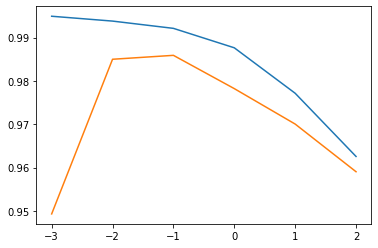

In [289]:
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
"""
--> 적절한 alpha 값: 0.1(log10 1=-1)
"""

'\n--> 적절한 alpha 값: 0.1(log10 1=-1)\n'

In [290]:
ridge=Ridge(alpha=0.1)
ridge.fit(train_scaled, train_target)
print(ridge.score(train_scaled, train_target))
print(ridge.score(test_scaled, test_target))


0.9921116627050741
0.9858888307599761


In [ ]:
poly=PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly=poly.transform(train_input)
test_poly=poly.transform(test_input)
print(train_poly.shape)

In [ ]:
poly.get_feature_names()

In [295]:
#라쏘회귀
from sklearn.linear_model import Lasso
lasso=Lasso()
lasso.fit(train_scaled,  train_target)
print(lasso.score(train_scaled, train_target))

0.9698136866393393


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.180e+15, tolerance: 2.106e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [296]:
print(lasso.score(test_scaled, test_target))

0.9469636611556049


In [297]:
train_score=[]
test_score=[]
alpha_list=[0.001,0.01,0.1,1,10,100,1000,10000,100000]
for alpha in alpha_list:
  lasso=Lasso(alpha=alpha, max_iter=1000)
  lasso.fit(train_scaled, train_target)
  train_score.append(lasso.score(train_scaled, train_target))
  test_score.append(lasso.score(test_scaled, test_target))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+15, tolerance: 2.106e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.179e+15, tolerance: 2.106e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

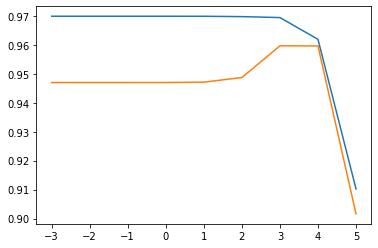

In [299]:
plt.plot(np.log10(alpha_list),train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [ ]:
#--> alpha 값: 10000

In [300]:

lasso=Lasso(alpha=10000)
lasso.fit(train_scaled, train_target)
print(lasso.score(train_scaled, train_target))
print(lasso.score(test_scaled, test_target))

0.9618537383031303
0.959582059758984


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.489e+15, tolerance: 2.106e+13
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


In [333]:
print(np.sum(lasso.coef_==0)) #계수가 0이 된 특성 0개
print(np.sum(ridge.coef_==0)) #계수가 0이 된 특성 0개

0
0


In [302]:
test = pd.read_csv('/content/FIFA_test.csv')
submission  = pd.read_csv('/content/submission.csv')
test.head()


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,ST,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,ST,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,MF,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,ST,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,MF,right,4.0,91,91,4.0


In [303]:
#test data의 position 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
pos = test['position'].values
le = LabelEncoder()
test['position'] = le.fit_transform(pos)
test.head()


,id,name,age,continent,contract_until,position,prefer_foot,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,europe,2022,3,right,5.0,94,94,5.0
1,2,Neymar Jr,26,south america,2022,3,right,5.0,92,93,5.0
2,4,K. De Bruyne,27,europe,2023,2,right,4.0,91,92,4.0
3,5,E. Hazard,27,europe,2020,3,right,4.0,91,91,4.0
4,6,L. Modrić,32,europe,2020,2,right,4.0,91,91,4.0


In [304]:
#test data의 continent 레이블 인코딩
con = test['continent'].values
le = LabelEncoder()
test['continent'] = le.fit_transform(con)
test = test.drop(['contract_until', 'prefer_foot'], axis = 1) #contract_until, prefer_foot은 value와 연관성이 떨어지니 제외
test.head()

,id,name,age,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,Cristiano Ronaldo,33,2,3,5.0,94,94,5.0
1,2,Neymar Jr,26,4,3,5.0,92,93,5.0
2,4,K. De Bruyne,27,2,2,4.0,91,92,4.0
3,5,E. Hazard,27,2,3,4.0,91,91,4.0
4,6,L. Modrić,32,2,2,4.0,91,91,4.0


In [305]:
test = test.drop(['name'], axis = 1) 
test.head()

,id,age,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,1,33,2,3,5.0,94,94,5.0
1,2,26,4,3,5.0,92,93,5.0
2,4,27,2,2,4.0,91,92,4.0
3,5,27,2,3,4.0,91,91,4.0
4,6,32,2,2,4.0,91,91,4.0


In [306]:
test = test.drop(['id'], axis = 1) 
test.head()

,age,continent,position,reputation,stat_overall,stat_potential,stat_skill_moves
0,33,2,3,5.0,94,94,5.0
1,26,4,3,5.0,92,93,5.0
2,27,2,2,4.0,91,92,4.0
3,27,2,3,4.0,91,91,4.0
4,32,2,2,4.0,91,91,4.0


In [324]:
test=test[['continent',	'position',	'age',	'reputation',	'stat_overall',	'stat_potential',	'stat_skill_moves']]
test.head()

,continent,position,age,reputation,stat_overall,stat_potential,stat_skill_moves
0,2,3,33,5.0,94,94,5.0
1,4,3,26,5.0,92,93,5.0
2,2,2,27,4.0,91,92,4.0
3,2,3,27,4.0,91,91,4.0
4,2,2,32,4.0,91,91,4.0


In [325]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3828 entries, 0 to 3827
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   continent         3828 non-null   int64  
 1   position          3828 non-null   int64  
 2   age               3828 non-null   int64  
 3   reputation        3828 non-null   float64
 4   stat_overall      3828 non-null   int64  
 5   stat_potential    3828 non-null   int64  
 6   stat_skill_moves  3828 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 209.5 KB


In [326]:
alldata_x = alldata
alldata_y = df['value']

In [327]:
model1 = ridge
model1.fit(alldata_x,alldata_y)

Ridge(alpha=0.1)

In [328]:
pred = model1.predict(test)
submission['value'] = pred
submission.head(10)

,id,value
0,1,3.668165e+07
1,2,3.869311e+07
2,4,3.142361e+07
3,5,3.167288e+07
4,6,2.937894e+07
5,10,3.035793e+07
6,11,3.075242e+07
7,15,2.551162e+07
8,17,3.047358e+07
9,23,2.953982e+07


In [320]:
alldata_x = alldata
alldata_y = df['value']

In [329]:
model2 = lasso
model2.fit(alldata_x,alldata_y)


Lasso(alpha=10000)

In [330]:
pred = model2.predict(test)
submission['value'] = pred
submission.head(10)

,id,value
0,1,3.650033e+07
1,2,3.843385e+07
2,4,3.125747e+07
3,5,3.148331e+07
4,6,2.924863e+07
5,10,3.018418e+07
6,11,3.055151e+07
7,15,2.539281e+07
8,17,3.030423e+07
9,23,2.935171e+07
